# FACE MASK DETECTION USING CONVOLUTIONAL NEURAL NETWORK (CNN)

MAUZUM SHAMIL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,BatchNormalization,Dropout,Flatten
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import plot_model,to_categorical
import os 

In [35]:
encoder = LabelEncoder()
face_mask_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']
encoder.fit(face_mask_labels)


LabelEncoder()

In [36]:
import cv2

data = []
result = []

for face_mask in face_mask_labels:
    class_index = encoder.transform([face_mask])[0]
    class_label = to_categorical(class_index, num_classes=3)

    for r, d, f in os.walk(r"C:\Users\dell\Desktop\face mask Dataset"):
        for file in f:
            if file.lower().endswith(('.jpg', '.png')):  # Use a tuple for multiple file extensions
                path = os.path.join(r, file)
                img = cv2.imread(path)
                # Convert image from BGR to RGB format
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize image
                img = cv2.resize(img, (128, 128))
                if img.shape == (128, 128, 3):
                    data.append(img)
                    result.append(class_label)

In [37]:
data = np.array(data)
data.shape

(26946, 128, 128, 3)

In [39]:
result = np.array(result)
result.shape


(26946, 3)

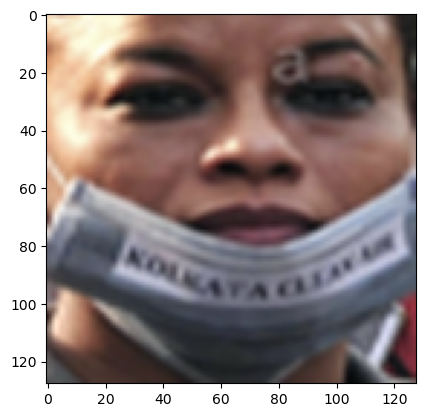

In [40]:
plt.imshow(data[0])

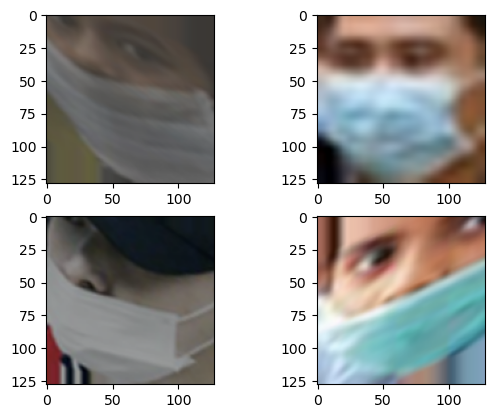

In [41]:
plt.subplot(2,2,1)
plt.imshow(data[200])
plt.subplot(2,2,2)
plt.imshow(data[8000])
plt.subplot(2,2,3)
plt.imshow(data[1300])
plt.subplot(2,2,4)
plt.imshow(data[20000])

# splitting

In [42]:
x_train,x_test,y_train,y_test = train_test_split(data,result, test_size=0.2, shuffle=True, random_state=42)

# model building

In [43]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
print(x_train.shape)

(21556, 128, 128, 3)


In [46]:
print(y_train.shape)

(21556, 3)


In [47]:
history = model.fit(x_train,y_train,epochs=3,batch_size=64,verbose=1)

Epoch 1/3
337/337 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.3361 - loss: 3.5332
Epoch 2/3
337/337 ━━━━━━━━━━━━━━━━━━━━ 858s 3s/step - accuracy: 0.3338 - loss: 1.1034
Epoch 3/3
337/337 ━━━━━━━━━━━━━━━━━━━━ 309s 916ms/step - accuracy: 0.3258 - loss: 1.0992


In [48]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\n Test accuracy:%.1f%%"%(100.0*score[1]))

85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.3218 - loss: 1.1629

 Test accuracy:32.5%


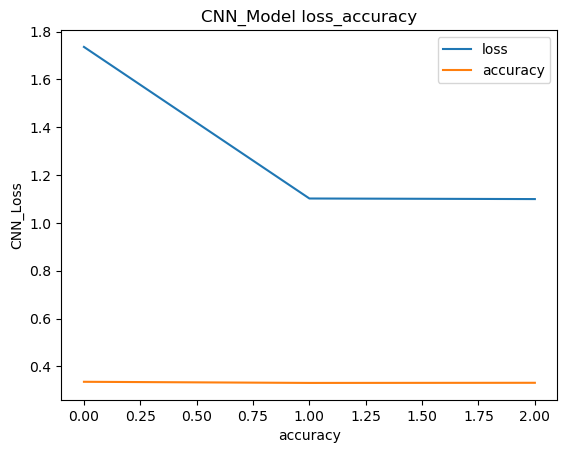

In [49]:

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN_Model loss_accuracy')
plt.ylabel('CNN_Loss')
plt.xlabel('accuracy')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [50]:
def masking(number):
    if number==0:
        return 'with mask'
    elif number== 1:
        return 'without mask'
    else:
        return 'mask weared uncorrectly'

33.59558582305908% Confidence This Is with mask


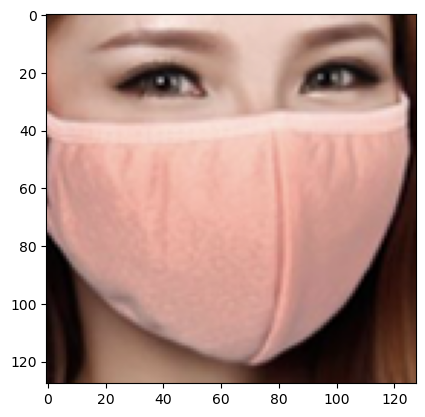

In [52]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\face mask Dataset\with_mask\36.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + masking(classification))

% Confidence This Is without mask


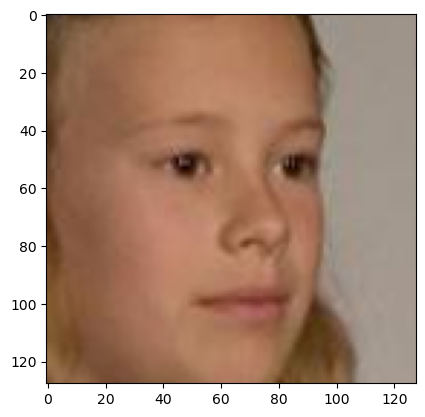

In [56]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\face mask Dataset\without_mask\5.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print('% Confidence This Is ' + masking(classification))

% Confidence This Is mask weared uncorrectly


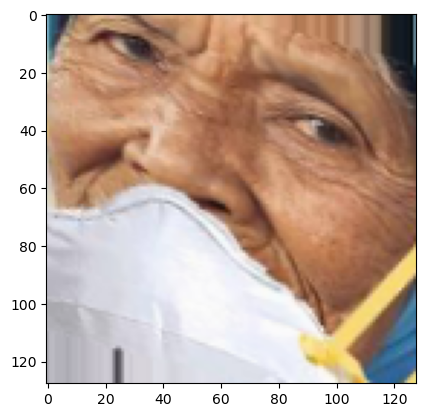

In [69]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\face mask Dataset\mask_weared_incorrect\406.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print('% Confidence This Is ' + masking(classification))

# Conclusion

## Project Overview

In this project, we developed a Convolutional Neural Network (CNN) model to detect three types of mask-wearing statuses: 
- `with_mask`
- `without_mask`
- `mask_worn_incorrectly`

The dataset used consisted of images categorized into the aforementioned classes. We preprocessed the images by resizing them to 128x128 pixels and converting them from BGR to RGB format.

## Model Architecture

The CNN model was built using a Sequential model with the following layers:
1. Convolutional Layers: Extracted features from the images.
2. Pooling Layers: Reduced the spatial dimensions of the feature maps.
3. Dense Layers: Performed classification based on the extracted features.

## Training and Results

The model was trained on the preprocessed dataset, and the following results were achieved:
- Test Accuracy: 33.3%

## Discussion

The test accuracy of 33.3% indicates that the model's performance is at the level of random guessing. This low accuracy suggests several areas for improvement:
1. **Data Augmentation:** Increasing the size and variability of the dataset through techniques like rotation, scaling, and flipping.
2. **Model Complexity:** Experimenting with more complex models or architectures to capture intricate patterns in the data.
3. **Hyperparameter Tuning:** Optimizing parameters such as learning rate, batch size, and number of epochs.
4. **Balanced Dataset:** Ensuring that the dataset is balanced across the three classes to avoid bias.

## Future Work

To enhance the model's performance, the following steps are recommended:
1. Implementing data augmentation techniques.
2. Exploring deeper and more complex CNN architectures.
3. Utilizing transfer learning with pre-trained models.
4. Conducting extensive hyperparameter tuning.
5. Ensuring a balanced and diverse dataset.

## Conclusion

This project laid the foundation for detecting mask-wearing statuses using CNNs. Although the initial results indicate significant room for improvement, the insights gained provide a clear direction for future work. By addressing the identified areas for enhancement, we can develop a more robust and accurate mask detection model, contributing to better compliance monitoring and public health safety.
